<p style="font-size:30px;text-align:center"> <b>Assignment 1</b> </p>

### Part 1: Histogram Modification

#### Problem Statement
We investigate the effect of an inverse gamma correction point operation given by the equation 
[F(x) = 255*(x/25)^Y]
on a perfectly normal image. The above point operation would produce an image which has to be gamma corrected to restore its original contrast.

***Include the original image and the pre-gamma corrected image in your report.***

In [1]:
# Importing necessary libraries
import warnings
warnings.filterwarnings("ignore") # Ignore warnings if any
import cv2 # Importing Open CV library
import numpy as np # Importing Numpy for matrix operations
import matplotlib.pyplot as plt # Useful for plotting the images
import scipy.misc

========== Original Image ==========


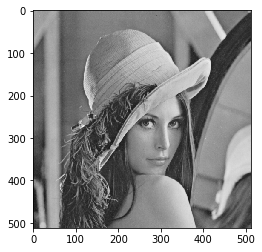

========== Transformed Image ==========


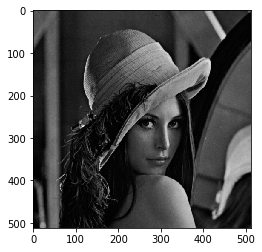

In [2]:
img = cv2.imread('lena.png') # Read image
print("="*10, "Original Image", "="*10)
plt.imshow(img)
plt.show() # Display the original image
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Read the grayscale version of above image
row = gray_img.shape[0] # How many rows?
col = gray_img.shape[1] # How many columns?

gray_img_transformed = np.zeros((512, 512)) # Empty matrix for storing the final transformed matrix
# Defining parameters that would be used to transform the image
const = 255  
power = 2.5 
# Run loop to manipulate intensity (pixel) values of the image
for i in range(row):
    for j in range(col):
        gray_img_transformed[i, j] = const * pow((gray_img[i, j] / const), power) # Transformation Function

scipy.misc.imsave('Transformed_image.png', gray_img_transformed) # Save the transformed image in pwd
print("="*10, "Transformed Image", "="*10)
Transformed_image = cv2.imread('Transformed_image.png') # Read the transformed image from pwd
plt.imshow(Transformed_image)
plt.show() # Display the transformed image
transformed_img = cv2.cvtColor(Transformed_image, cv2.COLOR_BGR2GRAY) # Read the grayscale version of transformed image

### Part 2: Image Histogram
#### Problem Statement
Write code that, given an image and a number of intensity bins, computes its histogram. Write the histogram values to a file and plot it. Run your code on the original image (lena) you used above for bins = 2, 128, and 256. Also run your code on the pre-gamma corrected image you produced above for bins 2, 128, and 256.

========== Histogram plot for original image ==========


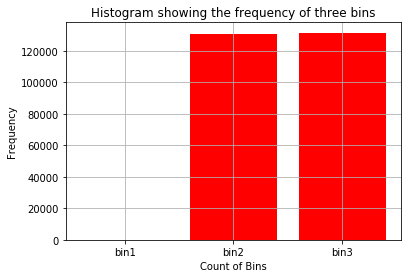

========== Histogram plot for transformed image ==========


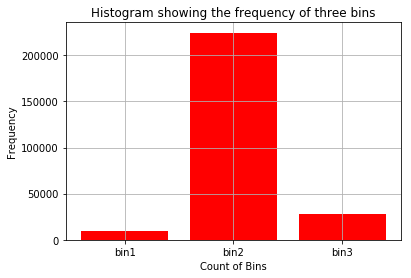

In [3]:
bin1_count = 0
bin2_count = 0
bin3_count = 0

# Histogram plot for original image
print("="*10, "Histogram plot for original image", "="*10)
for i in range(row):
    for j in range(col):
        if(gray_img[i, j] >= 0 and gray_img[i, j] <= 2):
            bin1_count += 1
        elif(gray_img[i, j] >= 3 and gray_img[i, j] <= 128):
            bin2_count += 1
        else:
            bin3_count += 1
dic = {'bin1': bin1_count, 'bin2': bin2_count, 'bin3': bin3_count}
plt.bar(dic.keys(), dic.values(), color='r')
plt.xlabel('Count of Bins')
plt.ylabel('Frequency')
plt.title('Histogram showing the frequency of three bins')
plt.grid()
plt.show()
bin1_count = 0
bin2_count = 0
bin3_count = 0

# Histogram plot for transformed image
print("="*10, "Histogram plot for transformed image", "="*10)
for i in range(row):
    for j in range(col):
        if(transformed_img[i, j] >= 0 and transformed_img[i, j] <= 2):
            bin1_count += 1
        elif(transformed_img[i, j] >= 3 and transformed_img[i, j] <= 128):
            bin2_count += 1
        else:
            bin3_count += 1
dic = {'bin1': bin1_count, 'bin2': bin2_count, 'bin3': bin3_count}
plt.bar(dic.keys(), dic.values(), color='r')
plt.xlabel('Count of Bins')
plt.ylabel('Frequency')
plt.title('Histogram showing the frequency of three bins')
plt.grid()
plt.show()

### Part 3: How Histogram Equalization Improves Contrast
#### Problem Statement
Write code to achieve histogram equalization. Use 256 bins. 
Include copies of the original and equalized histograms in your report as well as the original and equalized images.

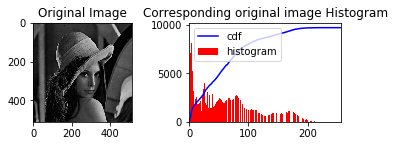

In [7]:
plt.figure()
plt.subplot(2,2,1)
# Showing the transformed image what we got in part 1 of this assignment
plt.imshow(Transformed_image)
plt.title('Original Image')

hist,bins = np.histogram(transformed_img.flatten(),256,[0,256])
# Calculating the CDF matrix
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.subplot(2,2,2)
plt.plot(cdf_normalized, color = 'b')
plt.hist(transformed_img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.title('Corresponding original image Histogram')
plt.show()

#### Observation: The histogram of the above image is not uniformly distributed as can be observed from the plot. Hence, in the next section, I adopted the concept of "Image equalization" to make the distribution uniform to enhance the original image.

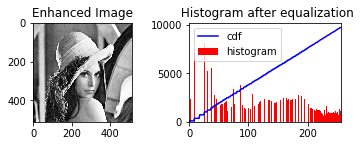

In [8]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img = cdf[transformed_img]

plt.figure()
plt.subplot(2,2,1)
scipy.misc.imsave('enhanced_image.png', img) # Save the transformed image in pwd
enhanced_image = cv2.imread('enhanced_image.png') # Read the transformed image from pwd
plt.imshow(enhanced_image)
plt.title('Enhanced Image')


hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.subplot(2,2,2)
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.title(' Histogram after equalization')
plt.show()

#### Observation: The histogram is more or less uniform and corresponding image is the enhanced image.